In [2]:
!pip install mysql-connector-python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as sql
import sqlalchemy
from sqlalchemy import create_engine

In [4]:
df_b = pd.read_csv("Boston.csv")
df_sj= pd.read_csv("San Jose.csv")
df_sf= pd.read_csv("San Fransico.csv")
df_se= pd.read_csv("Seattle.csv")
df_ny= pd.read_csv("New York.csv")

In [185]:
dat = pd.concat([df_b,df_sj,df_sf,df_se,df_ny],axis=0).drop_duplicates().reset_index(drop=True)

In [186]:
dat.shape

(999, 14)

In [187]:
dat.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist / Machine Learning Expert,$96K-$101K (Glassdoor Est.),Posting Title\nData Scientist / Machine Learni...,3.9,Novartis\n3.9,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996.0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$500+ billion (USD),-1
1,Data Scientist,$96K-$101K (Glassdoor Est.),Overview\n\n\nData Scientist\n\nLocations US-M...,4.0,Analysis Group\n4.0,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$10 to $50 billion (USD),-1
2,Data Scientist,$96K-$101K (Glassdoor Est.),Search by Keyword\nMore Options\n\nSearch by L...,4.1,ABIOMED\n4.1,"Danvers, MA","Danvers, MA",1001 to 5000 employees,1981.0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10 to $50 billion (USD),"Covidien, Boston Scientific"
3,Data Scientist,$96K-$101K (Glassdoor Est.),New England Biolabs is seeking a Data Scientis...,4.7,New England Biolabs\n4.7,"Ipswich, MA","Ipswich, MA",201 to 500 employees,1974.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,"Thermo Fisher Scientific, Enzymatics, Illumina"
4,Data Scientist,$96K-$101K (Glassdoor Est.),STR is a government research contractor specia...,4.7,Systems & Technology Research\n4.7,"Woburn, MA","Woburn, MA",201 to 500 employees,2010.0,Company - Private,Aerospace & Defence,Aerospace & Defence,$10 to $50 billion (USD),-1


In [188]:
dat.to_csv("fulldatase.csv")

In [189]:
import mysql.connector
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="tiger"
)

print(mydb)

In [190]:
mycursor = mydb.cursor()

mycursor.execute("CREATE DATABASE jobsalary1")

In [191]:
hostname="localhost"
dbname="jobsalary1"
uname="root"
pwd="tiger"


# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))

# Convert dataframe to sql table                                   
dat.to_sql('raw_data_job', engine, index=False)

# Clean

In [210]:
df = pd.read_sql_table("raw_data_job",con=engine)

In [211]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist / Machine Learning Expert,$96K-$101K (Glassdoor Est.),Posting Title\nData Scientist / Machine Learni...,3.9,Novartis\n3.9,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996.0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$500+ billion (USD),-1
1,Data Scientist,$96K-$101K (Glassdoor Est.),Overview\n\n\nData Scientist\n\nLocations US-M...,4.0,Analysis Group\n4.0,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$10 to $50 billion (USD),-1
2,Data Scientist,$96K-$101K (Glassdoor Est.),Search by Keyword\nMore Options\n\nSearch by L...,4.1,ABIOMED\n4.1,"Danvers, MA","Danvers, MA",1001 to 5000 employees,1981.0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10 to $50 billion (USD),"Covidien, Boston Scientific"
3,Data Scientist,$96K-$101K (Glassdoor Est.),New England Biolabs is seeking a Data Scientis...,4.7,New England Biolabs\n4.7,"Ipswich, MA","Ipswich, MA",201 to 500 employees,1974.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,"Thermo Fisher Scientific, Enzymatics, Illumina"
4,Data Scientist,$96K-$101K (Glassdoor Est.),STR is a government research contractor specia...,4.7,Systems & Technology Research\n4.7,"Woburn, MA","Woburn, MA",201 to 500 employees,2010.0,Company - Private,Aerospace & Defence,Aerospace & Defence,$10 to $50 billion (USD),-1


In [212]:
df['Salary Estimate'].unique()

array(['$96K-$101K (Glassdoor Est.)', '$97K-$137K (Glassdoor Est.)',
       '$101K-$133K (Glassdoor Est.)', '$89K-$147K (Glassdoor Est.)',
       '$94K-$116K (Glassdoor Est.)', '$92K-$132K (Glassdoor Est.)',
       '$58K-$99K (Glassdoor Est.)', '$212K-$332K (Glassdoor Est.)',
       '$117K-$150K (Glassdoor Est.)', '$86K-$143K (Glassdoor Est.)',
       '$125K-$156K (Glassdoor Est.)', '$111K-$153K (Glassdoor Est.)',
       '$141K-$225K (Glassdoor Est.)', '$110K-$145K (Glassdoor Est.)',
       '$200K-$250K(Employer Est.)', '$112K-$143K (Glassdoor Est.)',
       '$120K-$135K (Glassdoor Est.)', '$71K-$110K (Glassdoor Est.)',
       '$116K-$143K (Glassdoor Est.)', '$132K-$163K (Glassdoor Est.)',
       '$110K-$177K (Glassdoor Est.)', '$88K-$99K (Glassdoor Est.)',
       '$127K-$139K (Glassdoor Est.)', '$136K-$224K (Glassdoor Est.)',
       '$93K-$148K (Glassdoor Est.)', '$79K-$133K (Glassdoor Est.)',
       '$100K-$150K (Glassdoor Est.)', '$113K-$190K (Glassdoor Est.)',
       '$89K-$128K (G

In [213]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

In [214]:
df['Salary Estimate'].head()

0    $96K-$101K 
1    $96K-$101K 
2    $96K-$101K 
3    $96K-$101K 
4    $96K-$101K 
Name: Salary Estimate, dtype: object

In [215]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace("K","").replace("$",""))

In [216]:
df['Salary Estimate'].head()

0    96-101 
1    96-101 
2    96-101 
3    96-101 
4    96-101 
Name: Salary Estimate, dtype: object

In [217]:
df['Min Salary'] =df['Salary Estimate'].apply(lambda x:int(x.split("-")[0]))

In [218]:
df['Max Salary'] = df['Salary Estimate'].apply(lambda x:int(x.split("-")[1]))

In [219]:
df['Avg Salary'] = (df['Min Salary'] + df['Max Salary'])/2

In [220]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded              float64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Min Salary             int64
Max Salary             int64
Avg Salary           float64
dtype: object

In [221]:
df = df.dropna()

In [222]:
df['Company Name'] = df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-3], axis = 1)

In [224]:
df['Company Name'] = df['Company Name'].str.replace(r'\n', '')

In [225]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min Salary,Max Salary,Avg Salary
0,Data Scientist / Machine Learning Expert,96-101,Posting Title\nData Scientist / Machine Learni...,3.9,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996.0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$500+ billion (USD),-1,96,101,98.5
1,Data Scientist,96-101,Overview\n\n\nData Scientist\n\nLocations US-M...,4.0,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$10 to $50 billion (USD),-1,96,101,98.5
2,Data Scientist,96-101,Search by Keyword\nMore Options\n\nSearch by L...,4.1,ABIOMED,"Danvers, MA","Danvers, MA",1001 to 5000 employees,1981.0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10 to $50 billion (USD),"Covidien, Boston Scientific",96,101,98.5
3,Data Scientist,96-101,New England Biolabs is seeking a Data Scientis...,4.7,New England Biolabs,"Ipswich, MA","Ipswich, MA",201 to 500 employees,1974.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,"Thermo Fisher Scientific, Enzymatics, Illumina",96,101,98.5
4,Data Scientist,96-101,STR is a government research contractor specia...,4.7,Systems & Technology Research,"Woburn, MA","Woburn, MA",201 to 500 employees,2010.0,Company - Private,Aerospace & Defence,Aerospace & Defence,$10 to $50 billion (USD),-1,96,101,98.5


In [226]:
df['Job State'] = df['Location'].apply(lambda x: x.split(',')[1])

In [227]:
df['Job State'].value_counts()

 CA    399
 NY    266
 MA    200
 WA     98
 NJ     30
 CT      4
Name: Job State, dtype: int64

In [228]:
df['Same State'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0,axis =1)

In [229]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min Salary,Max Salary,Avg Salary,Job State,Same State
0,Data Scientist / Machine Learning Expert,96-101,Posting Title\nData Scientist / Machine Learni...,3.9,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996.0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$500+ billion (USD),-1,96,101,98.5,MA,0
1,Data Scientist,96-101,Overview\n\n\nData Scientist\n\nLocations US-M...,4.0,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$10 to $50 billion (USD),-1,96,101,98.5,MA,1
2,Data Scientist,96-101,Search by Keyword\nMore Options\n\nSearch by L...,4.1,ABIOMED,"Danvers, MA","Danvers, MA",1001 to 5000 employees,1981.0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10 to $50 billion (USD),"Covidien, Boston Scientific",96,101,98.5,MA,1
3,Data Scientist,96-101,New England Biolabs is seeking a Data Scientis...,4.7,New England Biolabs,"Ipswich, MA","Ipswich, MA",201 to 500 employees,1974.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,"Thermo Fisher Scientific, Enzymatics, Illumina",96,101,98.5,MA,1
4,Data Scientist,96-101,STR is a government research contractor specia...,4.7,Systems & Technology Research,"Woburn, MA","Woburn, MA",201 to 500 employees,2010.0,Company - Private,Aerospace & Defence,Aerospace & Defence,$10 to $50 billion (USD),-1,96,101,98.5,MA,1


In [230]:
df['Age'] = df['Founded'].apply(lambda x: x if x <1 else 2020-x)

In [231]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min Salary,Max Salary,Avg Salary,Job State,Same State,Age
0,Data Scientist / Machine Learning Expert,96-101,Posting Title\nData Scientist / Machine Learni...,3.9,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996.0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$500+ billion (USD),-1,96,101,98.5,MA,0,24.0
1,Data Scientist,96-101,Overview\n\n\nData Scientist\n\nLocations US-M...,4.0,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$10 to $50 billion (USD),-1,96,101,98.5,MA,1,39.0
2,Data Scientist,96-101,Search by Keyword\nMore Options\n\nSearch by L...,4.1,ABIOMED,"Danvers, MA","Danvers, MA",1001 to 5000 employees,1981.0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10 to $50 billion (USD),"Covidien, Boston Scientific",96,101,98.5,MA,1,39.0
3,Data Scientist,96-101,New England Biolabs is seeking a Data Scientis...,4.7,New England Biolabs,"Ipswich, MA","Ipswich, MA",201 to 500 employees,1974.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,"Thermo Fisher Scientific, Enzymatics, Illumina",96,101,98.5,MA,1,46.0
4,Data Scientist,96-101,STR is a government research contractor specia...,4.7,Systems & Technology Research,"Woburn, MA","Woburn, MA",201 to 500 employees,2010.0,Company - Private,Aerospace & Defence,Aerospace & Defence,$10 to $50 billion (USD),-1,96,101,98.5,MA,1,10.0


In [232]:
df['Python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

In [233]:
df['Python'].value_counts()

1    790
0    207
Name: Python, dtype: int64

In [234]:
df['R'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() or ",R" in x or "R," in x or ",R" in x or " R " in x in x.lower() else 0)

In [235]:
df['R'].value_counts()

0    642
1    355
Name: R, dtype: int64

In [236]:
df['AWS'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

In [237]:
df['AWS'].value_counts()

0    773
1    224
Name: AWS, dtype: int64

In [238]:
df['Excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [239]:
df['Excel'].value_counts()

0    619
1    378
Name: Excel, dtype: int64

In [240]:
df['Spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

In [241]:
df['Spark'].value_counts()

0    717
1    280
Name: Spark, dtype: int64

In [242]:
df['Tableau'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

In [243]:
df['Tableau'].value_counts()

0    837
1    160
Name: Tableau, dtype: int64

In [244]:
df['SQL'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)

In [245]:
df['SQL'].value_counts()

1    556
0    441
Name: SQL, dtype: int64

In [246]:
df['TensorFlow'] = df['Job Description'].apply(lambda x: 1 if 'tensorflow' in x.lower() else 0)

In [247]:
df['TensorFlow'].value_counts()

0    858
1    139
Name: TensorFlow, dtype: int64

In [248]:
df['PowerBI'] = df['Job Description'].apply(lambda x: 1 if 'powerbi' in x.lower() else 0)

In [249]:
df['PowerBI'].value_counts()#dropit

0    989
1      8
Name: PowerBI, dtype: int64

In [250]:
df['SaS'] = df['Job Description'].apply(lambda x: 1 if 'sas' in x.lower() else 0)

In [251]:
df['SaS'].value_counts()

0    885
1    112
Name: SaS, dtype: int64

In [252]:
df['Flask'] = df['Job Description'].apply(lambda x: 1 if 'flask' in x.lower() else 0)

In [253]:
df['Flask'].value_counts()

0    983
1     14
Name: Flask, dtype: int64

In [254]:
df['Hadoop'] = df['Job Description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)

In [255]:
df['Hadoop'].value_counts()

0    768
1    229
Name: Hadoop, dtype: int64

In [256]:
df['Statistics']=df["Job Description"].apply(lambda x:1 if 'statistics' in x.lower() or 'statistical' in x.lower() else 0)

In [257]:
df['Statistics'].value_counts()

1    801
0    196
Name: Statistics, dtype: int64

In [258]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Excel,Spark,Tableau,SQL,TensorFlow,PowerBI,SaS,Flask,Hadoop,Statistics
0,Data Scientist / Machine Learning Expert,96-101,Posting Title\nData Scientist / Machine Learni...,3.9,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996.0,Company - Public,...,0,0,0,0,0,0,0,0,0,1
1,Data Scientist,96-101,Overview\n\n\nData Scientist\n\nLocations US-M...,4.0,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,...,1,0,0,0,0,0,0,1,0,1
2,Data Scientist,96-101,Search by Keyword\nMore Options\n\nSearch by L...,4.1,ABIOMED,"Danvers, MA","Danvers, MA",1001 to 5000 employees,1981.0,Company - Public,...,1,1,0,0,1,0,0,0,1,1
3,Data Scientist,96-101,New England Biolabs is seeking a Data Scientis...,4.7,New England Biolabs,"Ipswich, MA","Ipswich, MA",201 to 500 employees,1974.0,Company - Private,...,1,0,0,0,0,0,0,0,0,0
4,Data Scientist,96-101,STR is a government research contractor specia...,4.7,Systems & Technology Research,"Woburn, MA","Woburn, MA",201 to 500 employees,2010.0,Company - Private,...,1,1,0,1,1,0,0,0,1,1


In [259]:
df.to_sql('cleaned_jobf', engine, index=False)

# EDA

In [260]:
df = pd.read_sql_table("cleaned_jobf",con=engine)

In [261]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Excel,Spark,Tableau,SQL,TensorFlow,PowerBI,SaS,Flask,Hadoop,Statistics
0,Data Scientist / Machine Learning Expert,96-101,Posting Title\nData Scientist / Machine Learni...,3.9,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996.0,Company - Public,...,0,0,0,0,0,0,0,0,0,1
1,Data Scientist,96-101,Overview\n\n\nData Scientist\n\nLocations US-M...,4.0,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,...,1,0,0,0,0,0,0,1,0,1
2,Data Scientist,96-101,Search by Keyword\nMore Options\n\nSearch by L...,4.1,ABIOMED,"Danvers, MA","Danvers, MA",1001 to 5000 employees,1981.0,Company - Public,...,1,1,0,0,1,0,0,0,1,1
3,Data Scientist,96-101,New England Biolabs is seeking a Data Scientis...,4.7,New England Biolabs,"Ipswich, MA","Ipswich, MA",201 to 500 employees,1974.0,Company - Private,...,1,0,0,0,0,0,0,0,0,0
4,Data Scientist,96-101,STR is a government research contractor specia...,4.7,Systems & Technology Research,"Woburn, MA","Woburn, MA",201 to 500 employees,2010.0,Company - Private,...,1,1,0,1,1,0,0,0,1,1


In [262]:
df['Job Title'].value_counts()

Data Scientist                                                           293
Senior Data Scientist                                                     70
Lead Data Scientist                                                       37
Principal Data Scientist                                                  19
Sr. Data Scientist                                                        12
                                                                        ... 
Data Scientist - CloudOps                                                  1
Behavioral Data Scientist, Health Strategic Initiatives                    1
Data Scientist training position                                           1
Senior Data Scientist â€“ Image Analytics, Novartis AI Innovation Lab      1
DATA Scientist                                                             1
Name: Job Title, Length: 437, dtype: int64

In [263]:
def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [264]:
df['Seniority'] = df['Job Title'].apply(seniority)

In [265]:
df['Seniority'].value_counts()

na        688
senior    300
junior      9
Name: Seniority, dtype: int64

In [266]:
df['Job State'].value_counts()

 CA    399
 NY    266
 MA    200
 WA     98
 NJ     30
 CT      4
Name: Job State, dtype: int64

In [267]:
df['Desc Length'] = df['Job Description'].apply(lambda x: len(x))

In [268]:
df['No of Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

In [269]:
df.describe()

,Rating,Founded,Min Salary,Max Salary,Avg Salary,Same State,Age,Python,R,AWS,...,Tableau,SQL,TensorFlow,PowerBI,SaS,Flask,Hadoop,Statistics,Desc Length,No of Competitors
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,...,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,3.300000,1557.958877,108.885657,152.281846,130.583751,0.380140,30.059178,0.792377,0.356068,0.224674,...,0.160481,0.557673,0.139418,0.008024,0.112337,0.014042,0.229689,0.803410,3322.421264,0.936810
std,1.659105,814.089379,32.937402,46.853825,38.655280,0.485665,45.318391,0.405809,0.479076,0.417577,...,0.367236,0.496912,0.346556,0.089262,0.315939,0.117724,0.420844,0.397619,1611.199288,1.337225
min,-1.000000,-1.000000,50.000000,99.000000,75.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,0.000000
25%,3.300000,1853.000000,89.000000,128.000000,106.000000,0.000000,4.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2212.000000,0.000000
50%,3.800000,1994.000000,101.000000,143.000000,125.000000,0.000000,14.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3299.000000,0.000000
75%,4.200000,2008.000000,125.000000,156.000000,140.500000,1.000000,31.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4249.000000,3.000000
max,5.000000,2019.000000,212.000000,332.000000,272.000000,1.000000,330.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14884.000000,4.000000


In [270]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Job State', 'Same State',
       'Age', 'Python', 'R', 'AWS', 'Excel', 'Spark', 'Tableau', 'SQL',
       'TensorFlow', 'PowerBI', 'SaS', 'Flask', 'Hadoop', 'Statistics',
       'Seniority', 'Desc Length', 'No of Competitors'],
      dtype='object')

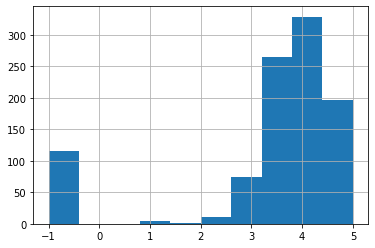

In [271]:
df['Rating'].hist()
plt.show()

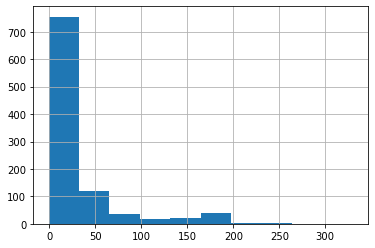

In [272]:
df['Age'].hist()
plt.show()

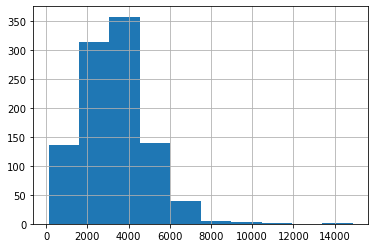

In [273]:
df['Desc Length'].hist()
plt.show()

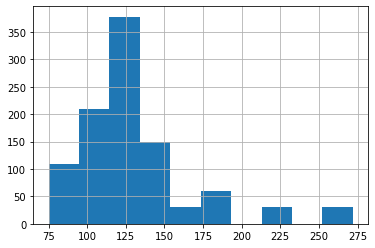

In [274]:
df['Avg Salary'].hist()
plt.show()

C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


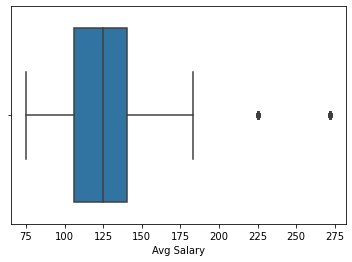

In [275]:
sns.boxplot(df['Avg Salary'])
plt.show()

C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


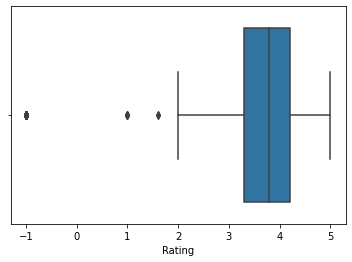

In [276]:
sns.boxplot(df['Rating'])
plt.show()

C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


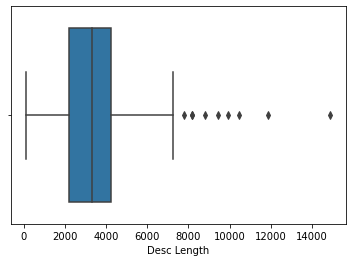

In [277]:
sns.boxplot(df['Desc Length'])
plt.show()

In [278]:
df[['Age','Avg Salary','Desc Length','Rating','No of Competitors']].corr()

,Age,Avg Salary,Desc Length,Rating,No of Competitors
Age,1.000000,-0.095845,0.219650,0.178671,0.249985
Avg Salary,-0.095845,1.000000,-0.056048,0.014799,0.077826
Desc Length,0.219650,-0.056048,1.000000,0.142888,0.260603
Rating,0.178671,0.014799,0.142888,1.000000,0.249715
No of Competitors,0.249985,0.077826,0.260603,0.249715,1.000000


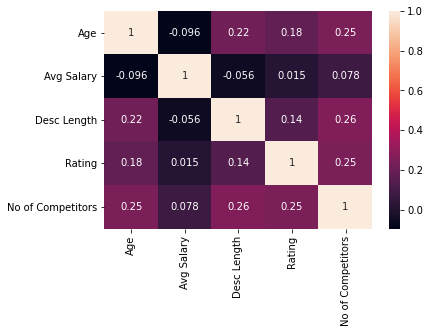

In [279]:
sns.heatmap(df[['Age','Avg Salary','Desc Length','Rating','No of Competitors']].corr(),annot=True)
plt.show()

In [280]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Job State', 'Same State',
       'Age', 'Python', 'R', 'AWS', 'Excel', 'Spark', 'Tableau', 'SQL',
       'TensorFlow', 'PowerBI', 'SaS', 'Flask', 'Hadoop', 'Statistics',
       'Seniority', 'Desc Length', 'No of Competitors'],
      dtype='object')

In [281]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership','Industry', 'Sector', 'Revenue','Company Name', 'Job State', 'Same State','R', 'Python', 'AWS', 'Excel','Spark', 'Tableau', 'SQL',
       'TensorFlow', 'PowerBI', 'SaS', 'Flask', 'Hadoop', 'Statistics', 'Seniority']]

C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


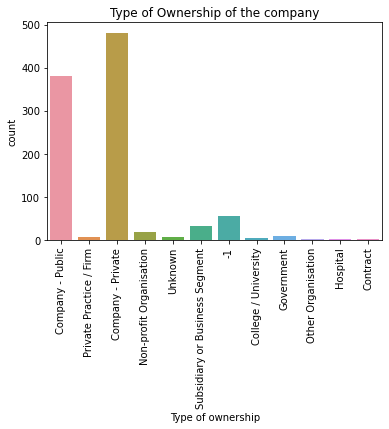

In [282]:
sns.countplot(df['Type of ownership'])
plt.title("Type of Ownership of the company")
plt.xticks(rotation=90)
plt.show()

C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


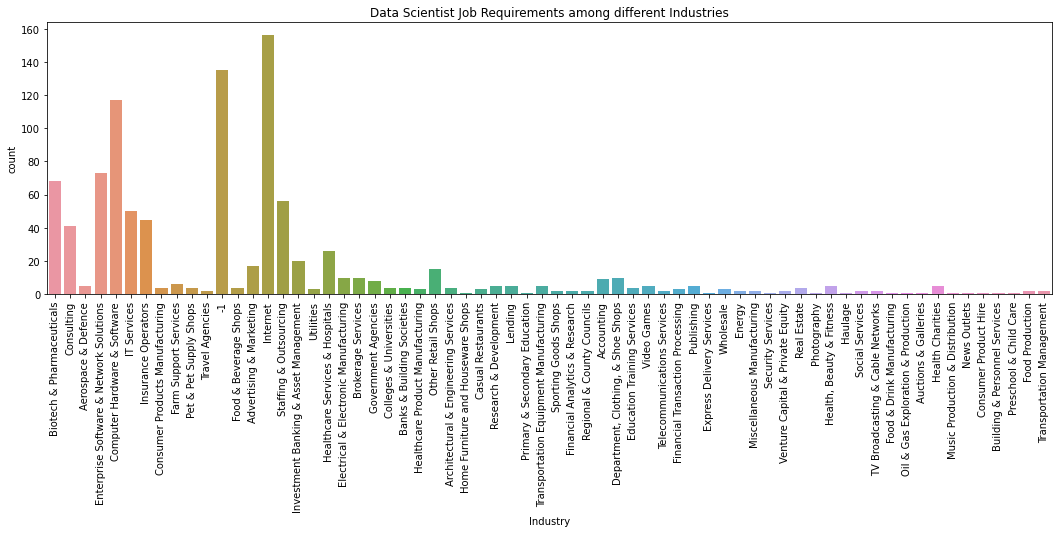

In [283]:
plt.figure(figsize=(18,5))
sns.countplot(df['Industry'])
plt.title("Data Scientist Job Requirements among different Industries")
plt.xticks(rotation=90)
plt.show()

C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


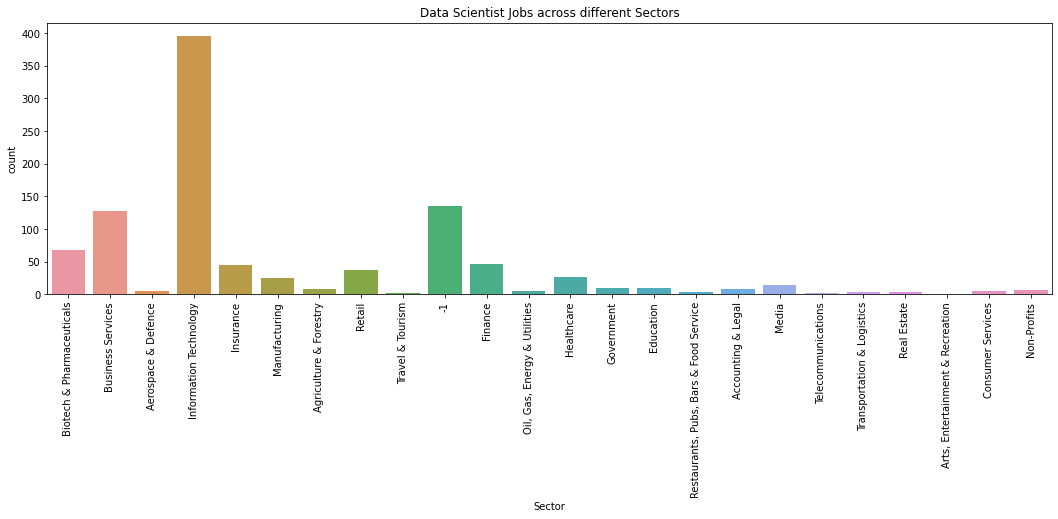

In [284]:
plt.figure(figsize=(18,5))
sns.countplot(df['Sector'])
plt.title("Data Scientist Jobs across different Sectors")
plt.xticks(rotation=90)
plt.show()

C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


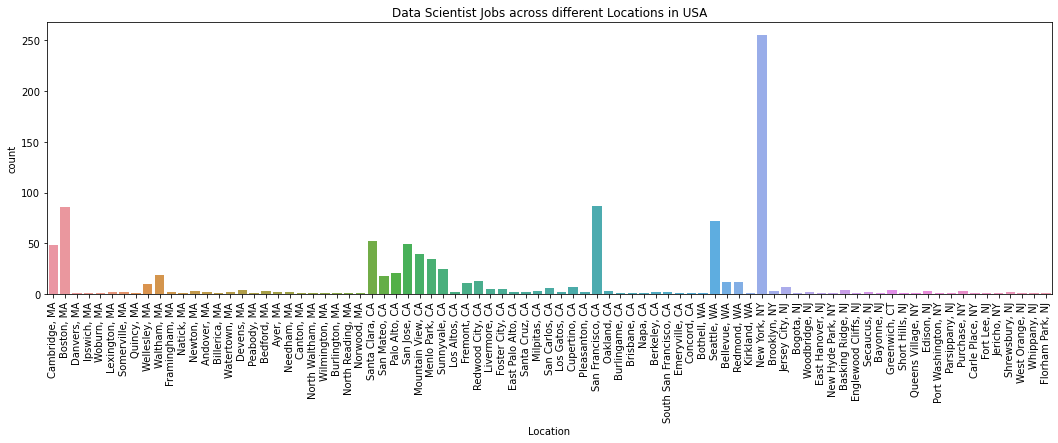

In [285]:
plt.figure(figsize=(18,5))
sns.countplot(df['Location'])
plt.title("Data Scientist Jobs across different Locations in USA")
plt.xticks(rotation=90)
plt.show()

C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


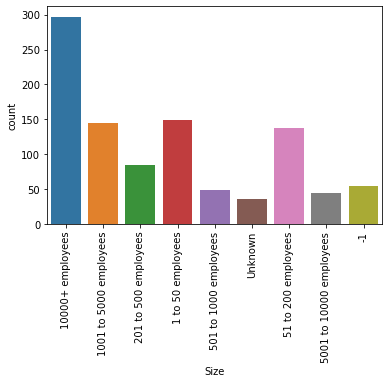

In [286]:
# plt.figure(figsize=(18,5))
sns.countplot(df['Size'])
plt.xticks(rotation=90)
plt.show()

C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


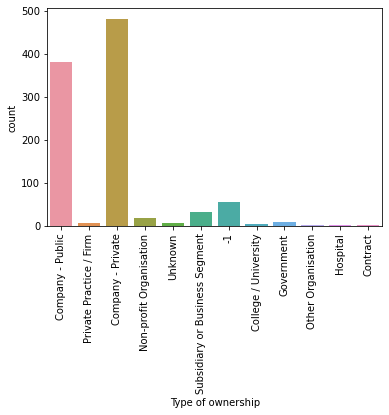

In [287]:
# plt.figure(figsize=(18,5))
sns.countplot(df['Type of ownership'])
plt.xticks(rotation=90)
plt.show()

C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


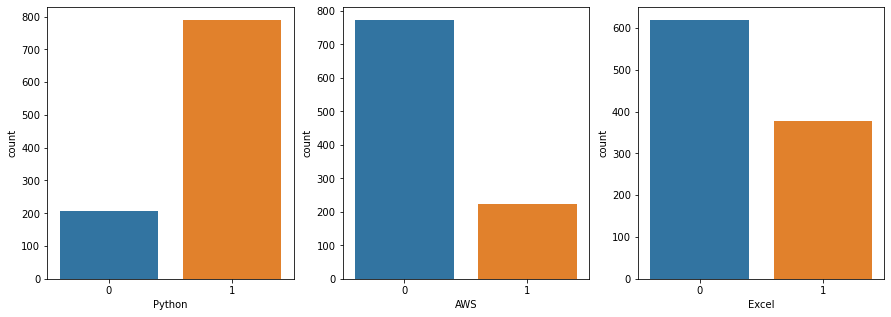

In [288]:

fig,axes = plt.subplots(1,3,figsize=(15,5))

sns.countplot(df['Python'],ax=axes[0])
sns.countplot(df['AWS'],ax=axes[1])
sns.countplot(df['Excel'],ax=axes[2])
# plt.title("Top Skills required for Data Scientist Roles")
plt.savefig("skills")
plt.show()

C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


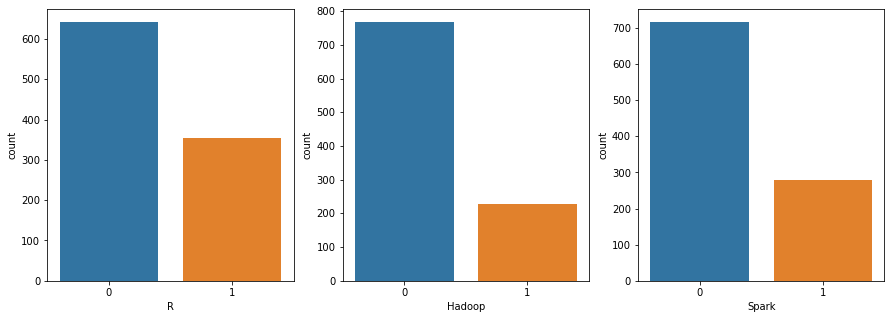

In [289]:

fig,axes = plt.subplots(1,3,figsize=(15,5))

sns.countplot(df['R'],ax=axes[0])
sns.countplot(df['Hadoop'],ax=axes[1])
sns.countplot(df['Spark'],ax=axes[2])
plt.savefig("skills1")
plt.show()

C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


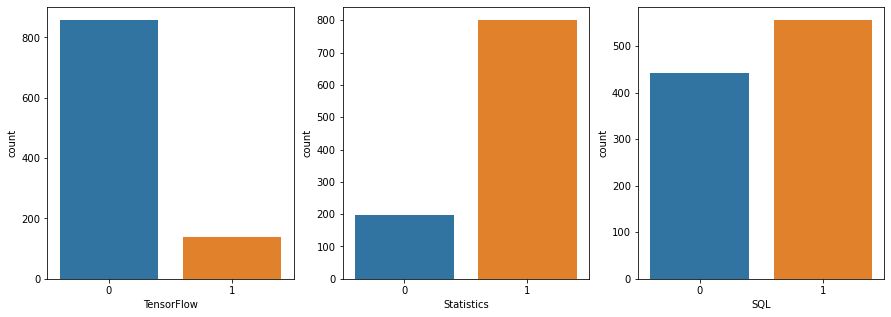

In [290]:
fig,axes = plt.subplots(1,3,figsize=(15,5))

sns.countplot(df['TensorFlow'],ax=axes[0])
sns.countplot(df['Statistics'],ax=axes[1])
sns.countplot(df['SQL'],ax=axes[2])
plt.savefig("skills2")
plt.show()

C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Chitrang\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


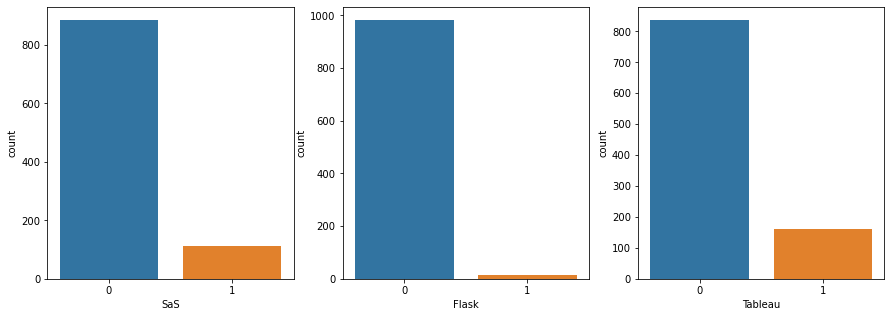

In [291]:
fig,axes = plt.subplots(1,3,figsize=(15,5))

sns.countplot(df['SaS'],ax=axes[0])
sns.countplot(df['Flask'],ax=axes[1])
sns.countplot(df['Tableau'],ax=axes[2])
plt.savefig("skills3")
plt.show()

In [292]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Job State', 'Same State',
       'Age', 'Python', 'R', 'AWS', 'Excel', 'Spark', 'Tableau', 'SQL',
       'TensorFlow', 'PowerBI', 'SaS', 'Flask', 'Hadoop', 'Statistics',
       'Seniority', 'Desc Length', 'No of Competitors'],
      dtype='object')

In [293]:
df['Seniority'].value_counts()

na        688
senior    300
junior      9
Name: Seniority, dtype: int64

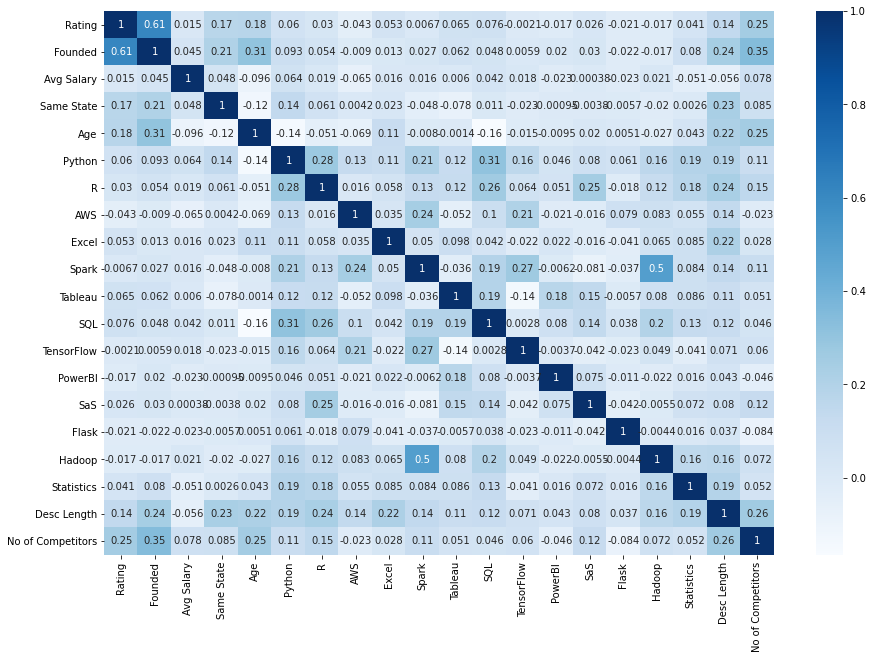

In [294]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(['Min Salary', 'Max Salary'],axis=1).corr(),cmap='Blues',annot=True)
plt.savefig("HeatMap")
plt.show()

In [295]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Job State', 'Same State',
       'Age', 'Python', 'R', 'AWS', 'Excel', 'Spark', 'Tableau', 'SQL',
       'TensorFlow', 'PowerBI', 'SaS', 'Flask', 'Hadoop', 'Statistics',
       'Seniority', 'Desc Length', 'No of Competitors'],
      dtype='object')

In [296]:
pd.pivot_table(df,index=['Seniority'],values=['Avg Salary'])

,Avg Salary
Seniority,
junior,122.555556
na,131.161337
senior,129.500000


In [297]:
pd.pivot_table(df,index=['Job State'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Job State,
CA,150.733083
WA,133.668367
NJ,118.383333
NY,118.005639
MA,107.975000
CT,103.500000


In [298]:
pd.pivot_table(df,index=['Sector'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Sector,
Telecommunications,186.250000
Accounting & Legal,147.222222
Education,145.700000
Information Technology,140.672980
Aerospace & Defence,140.300000
Non-Profits,134.000000
Government,133.500000
Real Estate,129.125000
Manufacturing,128.060000


In [299]:
pd.pivot_table(df,index=['Python'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Python,
1,131.848734
0,125.756039


In [300]:
pd.pivot_table(df,index=['Excel'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Excel,
1,131.359788
0,130.109855


In [301]:
pd.pivot_table(df,index=['AWS'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
AWS,
0,131.945019
1,125.886161


In [302]:
pd.pivot_table(df,index=['Revenue'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Revenue,
$5 to $10 billion (USD),141.388889
$500 million to $1 billion (USD),138.894737
$500+ billion (USD),137.137681
-1,136.081818
$10 to $50 million (USD),133.757576
$100 to $500 million (USD),130.595238
$1 to $5 billion (USD),129.331250
Unknown / Non-Applicable,128.193548
$100 to $500 billion (USD),121.258621


In [303]:
pd.pivot_table(df,index=['Rating'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Rating,
2.4,165.875000
4.7,153.960000
4.2,147.840000
4.1,145.184211
4.4,140.844262
4.3,138.957447
1.6,133.750000
-1.0,132.191304
2.7,132.071429


In [304]:
pd.pivot_table(df,index=['Type of ownership'],values=['Avg Salary']).sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Type of ownership,
Other Organisation,147.500000
Company - Public,136.351316
-1,136.081818
Government,133.944444
Contract,133.000000
Hospital,133.000000
Unknown,127.857143
Company - Private,126.475052
Subsidiary or Business Segment,125.234375


In [305]:
pd.options.display.max_rows

60

In [306]:
pd.set_option('display.max_rows',None)

In [307]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [308]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

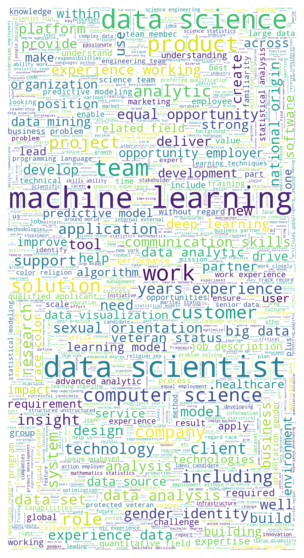

In [309]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [314]:
df.to_sql('edajob', engine, index=False)

#  ML

In [315]:
df = pd.read_sql_table("edajob",con=engine)

In [337]:
dfed = pd.read_sql_table("edajob",con=engine)

In [338]:
dfed.to_csv('edadata.csv')

In [316]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,SQL,TensorFlow,PowerBI,SaS,Flask,Hadoop,Statistics,Seniority,Desc Length,No of Competitors
0,Data Scientist / Machine Learning Expert,96-101,Posting Title\nData Scientist / Machine Learni...,3.9,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996.0,Company - Public,...,0,0,0,0,0,0,1,na,5103,0
1,Data Scientist,96-101,Overview\n\n\nData Scientist\n\nLocations US-M...,4.0,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,...,0,0,0,0,1,0,1,na,9898,0
2,Data Scientist,96-101,Search by Keyword\nMore Options\n\nSearch by L...,4.1,ABIOMED,"Danvers, MA","Danvers, MA",1001 to 5000 employees,1981.0,Company - Public,...,0,1,0,0,0,1,1,na,10444,2
3,Data Scientist,96-101,New England Biolabs is seeking a Data Scientis...,4.7,New England Biolabs,"Ipswich, MA","Ipswich, MA",201 to 500 employees,1974.0,Company - Private,...,0,0,0,0,0,0,0,na,2161,3
4,Data Scientist,96-101,STR is a government research contractor specia...,4.7,Systems & Technology Research,"Woburn, MA","Woburn, MA",201 to 500 employees,2010.0,Company - Private,...,1,1,0,0,0,1,1,na,3711,0


In [317]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Job State', 'Same State',
       'Age', 'Python', 'R', 'AWS', 'Excel', 'Spark', 'Tableau', 'SQL',
       'TensorFlow', 'PowerBI', 'SaS', 'Flask', 'Hadoop', 'Statistics',
       'Seniority', 'Desc Length', 'No of Competitors'],
      dtype='object')

In [318]:
df_model = df[['Avg Salary','Rating','Size','Sector','Revenue','No of Competitors','Job State', 'Same State',
       'Age', 'R', 'Python', 'AWS', 'Excel', 'Spark', 'Tableau', 'SQL',
       'TensorFlow', 'PowerBI', 'SaS', 'Flask', 'Hadoop', 'Statistics', 'Seniority',
       'Desc Length']]

In [319]:
df_model.head()

,Avg Salary,Rating,Size,Sector,Revenue,No of Competitors,Job State,Same State,Age,R,...,Tableau,SQL,TensorFlow,PowerBI,SaS,Flask,Hadoop,Statistics,Seniority,Desc Length
0,98.5,3.9,10000+ employees,Biotech & Pharmaceuticals,$500+ billion (USD),0,MA,0,24.0,1,...,0,0,0,0,0,0,0,1,na,5103
1,98.5,4.0,1001 to 5000 employees,Business Services,$10 to $50 billion (USD),0,MA,1,39.0,1,...,0,0,0,0,0,1,0,1,na,9898
2,98.5,4.1,1001 to 5000 employees,Biotech & Pharmaceuticals,$10 to $50 billion (USD),2,MA,1,39.0,0,...,0,0,1,0,0,0,1,1,na,10444
3,98.5,4.7,201 to 500 employees,Biotech & Pharmaceuticals,Unknown / Non-Applicable,3,MA,1,46.0,1,...,0,0,0,0,0,0,0,0,na,2161
4,98.5,4.7,201 to 500 employees,Aerospace & Defence,$10 to $50 billion (USD),0,MA,1,10.0,0,...,0,1,1,0,0,0,1,1,na,3711


In [320]:
df_model.describe()

,Avg Salary,Rating,No of Competitors,Same State,Age,R,Python,AWS,Excel,Spark,Tableau,SQL,TensorFlow,PowerBI,SaS,Flask,Hadoop,Statistics,Desc Length
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,130.583751,3.300000,0.936810,0.380140,30.059178,0.356068,0.792377,0.224674,0.379137,0.280843,0.160481,0.557673,0.139418,0.008024,0.112337,0.014042,0.229689,0.803410,3322.421264
std,38.655280,1.659105,1.337225,0.485665,45.318391,0.479076,0.405809,0.417577,0.485416,0.449636,0.367236,0.496912,0.346556,0.089262,0.315939,0.117724,0.420844,0.397619,1611.199288
min,75.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000
25%,106.000000,3.300000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2212.000000
50%,125.000000,3.800000,0.000000,0.000000,14.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3299.000000
75%,140.500000,4.200000,3.000000,1.000000,31.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4249.000000
max,272.000000,5.000000,4.000000,1.000000,330.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14884.000000


In [321]:
df_dum = pd.get_dummies(df_model)

In [322]:
df_dum.head()

,Avg Salary,Rating,No of Competitors,Same State,Age,R,Python,AWS,Excel,Spark,...,Revenue_Unknown / Non-Applicable,Job State_ CA,Job State_ CT,Job State_ MA,Job State_ NJ,Job State_ NY,Job State_ WA,Seniority_junior,Seniority_na,Seniority_senior
0,98.5,3.9,0,0,24.0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,98.5,4.0,0,1,39.0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,1,0
2,98.5,4.1,2,1,39.0,0,1,1,1,1,...,0,0,0,1,0,0,0,0,1,0
3,98.5,4.7,3,1,46.0,1,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
4,98.5,4.7,0,1,10.0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0


In [323]:
X = df_dum.drop('Avg Salary',axis=1)
y = df_dum['Avg Salary']

In [324]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [325]:
X_test.columns

Index(['Rating', 'No of Competitors', 'Same State', 'Age', 'R', 'Python',
       'AWS', 'Excel', 'Spark', 'Tableau', 'SQL', 'TensorFlow', 'PowerBI',
       'SaS', 'Flask', 'Hadoop', 'Statistics', 'Desc Length', 'Size_-1',
       'Size_1 to 50 employees', 'Size_10000+ employees',
       'Size_1001 to 5000 employees', 'Size_201 to 500 employees',
       'Size_5001 to 10000 employees', 'Size_501 to 1000 employees',
       'Size_51 to 200 employees', 'Size_Unknown', 'Sector_-1',
       'Sector_Accounting & Legal', 'Sector_Aerospace & Defence',
       'Sector_Agriculture & Forestry',
       'Sector_Arts, Entertainment & Recreation',
       'Sector_Biotech & Pharmaceuticals', 'Sector_Business Services',
       'Sector_Consumer Services', 'Sector_Education', 'Sector_Finance',
       'Sector_Government', 'Sector_Healthcare',
       'Sector_Information Technology', 'Sector_Insurance',
       'Sector_Manufacturing', 'Sector_Media', 'Sector_Non-Profits',
       'Sector_Oil, Gas, Energy & Utilitie

In [326]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)

In [327]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Avg Salary   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     5.056
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           5.55e-31
Time:                        18:42:03   Log-Likelihood:                -4902.9
No. Observations:                 997   AIC:                             9942.
Df Residuals:                     929   BIC:                         1.028e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            74.7307      4.617     16.185      0.000      65.669      83.792
Rating                                           -0.8988      1.025     -0.877      0.381      -2.910       1.112
No of Competitors                                -1.2065      1.201     -1.004      0.315      -3.564       1.151
Same State                                       -0.2450      2.678     -0.091      0.927      -5.500       5.010
Age                                              -0.0346      0.038     -0.924      0.356      -0.108       0.039
R                                                 1.7805      2.665      0.668      0.504      -3.450       7.011
Python                                            4.8361      3.280      1.474      0.141      -1.602      11.274
AWS                                              -1.7270      2.906     -0.594      0.552      -7.430       3.976
Excel                                             2.7413      2.423      1.131      0.258      -2.014       7.497
Spark                                            -1.7822      3.168     -0.563      0.574      -7.999       4.435
Tableau                                           1.8217      3.316      0.549      0.583      -4.685       8.329
SQL                                              -2.3269      2.605     -0.893      0.372      -7.439       2.785
TensorFlow                                        1.2076      3.514      0.344      0.731      -5.689       8.104
PowerBI                                          -7.9878     13.056     -0.612      0.541     -33.610      17.634
SaS                                               1.2036      3.856      0.312      0.755      -6.364       8.771
Flask                                            -6.9267      9.748     -0.711      0.478     -26.057      12.203
Hadoop                                           -1.1487      3.186     -0.361      0.718      -7.401       5.103
Statistics                                       -4.2484      3.023     -1.405      0.160     -10.182       1.685
Desc Length                                      -0.0008      0.001     -0.955      0.340      -0.003       0.001
Size_-1                                          11.8709      3.471      3.420      0.001       5.059      18.683
Size_1 to 50 employees                            1.8543      3.585      0.517      0.605      -5.181       8.889
Size_10000+ employees                            11.3009      5.185      2.179      0.030       1.125      21.477
Size_1001 to 5000 employees                      13.8972      3.456      4.021      0.000       7.114      20.680
Size_201 to 500 employees                         4.0561      4.193      0.967      0.334      -4.173      12.285
Size_

In [328]:
from sklearn.linear_model import LinearRegression,Lasso
lm = LinearRegression()

In [329]:
lm.fit(X_train, y_train)

LinearRegression()

In [330]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error',cv=3))

[-25.38441609 -25.91685391 -25.5047144 ]


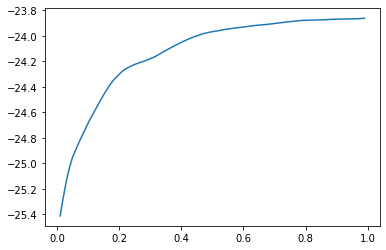

In [331]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [332]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
98,0.99,-23.862753


In [333]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [334]:
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-25.16884541187875

In [336]:
import pickle
pickl = {'model': lm}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )